<a href="https://colab.research.google.com/github/Deepan-mn/Machine-Learning-Projects/blob/main/Handwritten%20Digit%20Recognition%20using%20CNN/Handwritten_Digit_Recognition.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## Import Module

In [ ]:
import tensorflow as tf
import matplotlib.pyplot as plt


## Dataset
  Loading -"MNIST Data Set"
  Containing Training samples =60,000 ,Testing samples = 10,000
  Tensorflow already contain MNIST data set which can be loaded using Keras

In [ ]:
mnistdata =tf.keras.datasets.mnist # this is handwritten characters based on 28x28 sized images of 0 to 9

## Divide Into Train and Test Dataset

In [ ]:
#unpacking the dataset into train and test dataset
(x_train,y_train),(x_test,y_test) =mnistdata.load_data()

In [ ]:
x_train.shape

(60000, 28, 28)

## Exploratory Data Analysis

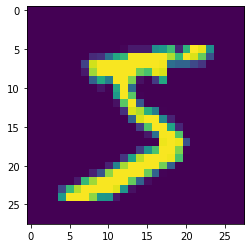

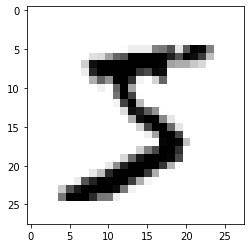

In [ ]:
plt.imshow(x_train[0])
plt.show() # in order to execute the graph
# we dont know whether its color image or binary image
# so inorder to plot it change the configuration
plt.imshow(x_train[0],cmap=plt.cm.binary)

## Data Preprocessing

**BEFORE NORMALIZATION**

In [ ]:
# checking the values of each pixel
# Before Normalization
print(x_train[0])  

[[  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0   0
    0   0   0   0   0   0   0   0   0   0]
 [  0   0   0   0   0   0   0   0   0   0   0   0   3  18  18  18 126 136
  175  26 166 255 247 127   0   0   0   0]
 [  0   0   0   0   0   0   0   0  30  36  94 154 170 253 253 253 253 253
  225 172 253 242 195  64   0   0   0   0]
 [  0   0   0   0   0   0   0  49 238 253 253 253 253 253 253 253 253 251
   93  82  82  56  39   0   0   0   0   0]
 [  0   0   0   0   0   0   0  18 219 253 253 253 253 253 198 18

**As image are in Grey level (1 channel ==> 0 to 255), not Colored(RGB)**<br>
**Normalizing the data | Pre-Processing Step**

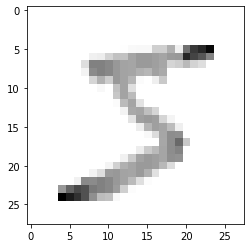

In [ ]:
#the images is gray , the value varies from 0 to 255
# in ordere to normalize it , other method  is  x/255
x_train  = tf.keras.utils.normalize(x_train,axis=1) # 1 ->row or 0-> column
x_test   = tf.keras.utils.normalize(x_test,axis=1)
plt.imshow(x_train[0],cmap=plt.cm.binary)

**AFTER NORMALIZATION**

In [ ]:
print(x_train[0])  # all values is 0 to 1

[[0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.        ]
 [0.         0.         0.         0.         0.         0.
  0.         0.         0.         0.         0.         0.
  0.         0.    

In [ ]:
print(y_train[0])  # check the label

5


**Resizing the image to make it suitable for apply Convolution operation**

In [ ]:
import numpy as np
IMG_SIZE = 28
x_trainr =np.array(x_train).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increase one dimension for kernal-filter operation
x_testr = np.array(x_test).reshape(-1,IMG_SIZE,IMG_SIZE,1) # increase one dimension for kernal-filter operation
print("Training Sample dimession",x_train.shape)
print("Testing Sample dimension",x_test.shape)

Training Sample dimession (60000, 28, 28)
Testing Sample dimension (10000, 28, 28)


##Model Creation

In [ ]:
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout,Activation,Flatten,Conv2D,MaxPool2D

In [ ]:
model=tf.keras.Sequential([
                  Conv2D(64,(3,3),activation='relu',input_shape=x_trainr.shape[1:]),
                  MaxPool2D((2,2)),

                  Conv2D(64,(3,3),activation='relu'),
                  MaxPool2D((2,2)),

                  Conv2D(64,(3,3),activation='relu'),
                  MaxPool2D((2,2)),

                  Flatten(),

                  Dense(64,activation='relu'),
                  
                  Dense(32,activation='relu'),

                  Dense(10,activation='softmax')
])

In [ ]:
model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)               

In [ ]:
print("Total training samples ", len(x_trainr))

Total training samples  60000


In [ ]:
## Compile the Model
model.compile(loss='sparse_categorical_crossentropy', optimizer='adam',metrics=['accuracy'])

In [ ]:
## Model Training 

history=model.fit(x_trainr,y_train,epochs=5,validation_split=0.3)

Epoch 1/5
1313/1313 [==============================] - 65s 50ms/step - loss: 0.0357 - accuracy: 0.9879 - val_loss: 0.0691 - val_accuracy: 0.9798
Epoch 2/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0303 - accuracy: 0.9905 - val_loss: 0.0536 - val_accuracy: 0.9838
Epoch 3/5
1313/1313 [==============================] - 66s 51ms/step - loss: 0.0252 - accuracy: 0.9920 - val_loss: 0.0735 - val_accuracy: 0.9775
Epoch 4/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0225 - accuracy: 0.9928 - val_loss: 0.0645 - val_accuracy: 0.9820
Epoch 5/5
1313/1313 [==============================] - 67s 51ms/step - loss: 0.0186 - accuracy: 0.9935 - val_loss: 0.0565 - val_accuracy: 0.9842


**NOTE**<br>if validation accuracy (30) < accuracy(90) ,  then it is **Overfitting**  , solution is **Droupout** 

## Visualziation of Results

<Figure size 432x288 with 0 Axes>

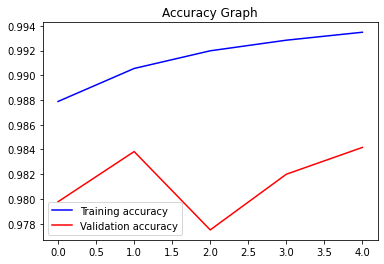

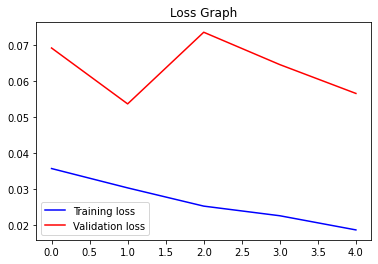

<Figure size 432x288 with 0 Axes>

In [ ]:
## Accuracy Graph
acc = history.history['accuracy']
val_acc = history.history['val_accuracy']
epochs =range(len(acc))

plt.plot(epochs, acc, 'b',label='Training accuracy')
plt.plot(epochs, val_acc, 'r',label='Validation accuracy')
plt.title('Accuracy Graph')
plt.legend()
plt.figure()


## loss Graph
loss = history.history['loss']
val_loss = history.history['val_loss']
epochs =range(len(acc))

plt.plot(epochs, loss, 'b',label='Training loss')
plt.plot(epochs, val_loss, 'r',label='Validation loss')
plt.title('Loss Graph')
plt.legend()
plt.figure()

## Evaluation of Model

In [ ]:
test_loss,test_acc =model.evaluate(x_testr,y_test)
print("Test loss on 10,000 test samples",test_loss)
print("Validation Accuracy on 10,000 test samples",test_acc)

313/313 [==============================] - 4s 14ms/step - loss: 0.0515 - accuracy: 0.9849
Test loss on 10,000 test samples 0.05149899795651436
Validation Accuracy on 10,000 test samples 0.9848999977111816


## Predict the Model

In [ ]:
predictions = model.predict([x_testr])

In [ ]:
print(predictions)

[[1.47453214e-08 2.06188435e-08 1.73405933e-05 ... 9.99980092e-01
  4.52517934e-09 2.13207204e-06]
 [1.29291866e-05 2.72025354e-11 9.99986768e-01 ... 3.99846067e-09
  9.91911762e-08 1.07443441e-08]
 [3.50505935e-08 9.99952316e-01 6.25552389e-07 ... 2.05168944e-05
  8.76697413e-06 3.90395780e-06]
 ...
 [2.44492671e-09 6.46393943e-08 7.06158965e-10 ... 5.66464507e-07
  1.05471020e-06 3.59096276e-07]
 [4.64133567e-14 3.94712813e-14 3.18011241e-17 ... 1.20356891e-15
  1.12188245e-10 1.24898503e-09]
 [3.04418313e-06 4.61685374e-08 6.60065723e-07 ... 1.24206623e-09
  1.10180736e-07 1.78292979e-07]]


In [ ]:
# in order to understand, convert the prediction from one hot encoding , we need to use numpy for that 
print(np.argmax(predictions[128]))#so actually argmax will return the maximum value index and find the value of it
#argmax , since we are using softmax

8


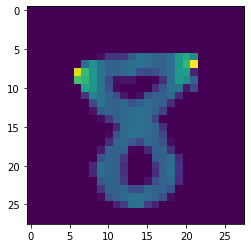

In [ ]:
# check the label
plt.imshow(x_test[128])

**PREDICT CUSTOM DATA**

In [ ]:
from google.colab import files
uploaded =files.upload()

Saving digit07.png to digit07.png


In [ ]:
import cv2

In [ ]:
img = cv2.imread('/content/digit07.png')

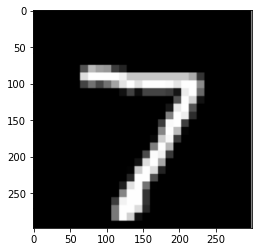

In [ ]:
plt.imshow(img)

In [ ]:
img.shape

(298, 300, 3)

In [ ]:
gray = cv2.cvtColor(img,cv2.COLOR_BGR2GRAY)

In [ ]:
gray.shape

(298, 300)

In [ ]:
resized = cv2.resize(gray,(28,28),interpolation=cv2.INTER_AREA)

In [ ]:
resized.shape

(28, 28)

In [ ]:
newimg=tf.keras.utils.normalize(resized,axis=1) # 0 to 1


In [ ]:
newimg=np.array(newimg).reshape(-1,IMG_SIZE,IMG_SIZE,1)

In [ ]:
newimg.shape

(1, 28, 28, 1)

In [ ]:
predictions =model.predict(newimg)
print(np.argmax(predictions))

7


## Save Model

In [ ]:
import os.path
if os.path.isfile('/content/models/Handwritten_Digit_Recognitition_version_2.h5') is False:
  model.save('/content/models/Handwritten_Digit_Recognitition_version_2.h5')
else:
  print("model didn't save")

In [ ]:
from tensorflow.keras.models import load_model
new_model=load_model('/content/models/Handwritten_Digit_Recognitition_version_2.h5')

In [ ]:
new_model.summary()

Model: "sequential_5"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_13 (Conv2D)           (None, 26, 26, 64)        640       
_________________________________________________________________
max_pooling2d_5 (MaxPooling2 (None, 13, 13, 64)        0         
_________________________________________________________________
conv2d_14 (Conv2D)           (None, 11, 11, 64)        36928     
_________________________________________________________________
max_pooling2d_6 (MaxPooling2 (None, 5, 5, 64)          0         
_________________________________________________________________
conv2d_15 (Conv2D)           (None, 3, 3, 64)          36928     
_________________________________________________________________
max_pooling2d_7 (MaxPooling2 (None, 1, 1, 64)          0         
_________________________________________________________________
flatten (Flatten)            (None, 64)               